In [43]:
import pandas as pd
import math
from matplotlib import pyplot
from IPython.display import Image
from IPython.core.display import HTML
import statsmodels.api as sm
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Exploration

In [2]:
tma = pd.read_csv('data.csv')
tma.head()

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,32,2,56,2,2,2,1,2,1,2,...,2,1,1,1,2,1,1,1,2,2
1,17,1,30,1,2,1,1,2,1,1,...,1,1,2,2,2,2,2,2,2,2
2,41,1,32,2,1,1,2,1,1,1,...,1,1,1,2,1,1,2,1,1,2
3,31,1,29,1,2,2,1,1,1,1,...,1,2,1,1,1,1,1,2,1,2
4,35,1,23,1,2,2,1,1,2,1,...,2,1,1,1,1,1,2,1,1,2


## Checking if there is any missing values
The list row_missing_data contains all the rows that have missing values   
The function dropna() drops all rows that contain null values   
The function sum() shows a summarization of null rows   

In [3]:
row_missing_data = tma[tma.isnull().any(axis=1)]
print (tma.isnull().sum())
tma  = tma.dropna()

score     0
gender    0
age       0
Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
Q21       0
Q22       0
Q23       0
Q24       0
Q25       0
Q26       0
Q27       0
Q28       0
Q29       0
Q30       0
Q31       0
Q32       0
Q33       0
Q34       0
Q35       0
Q36       0
Q37       0
Q38       0
Q39       0
Q40       0
Q41       0
Q42       0
Q43       0
Q44       0
Q45       0
Q46       0
Q47       0
Q48       0
Q49       0
Q50       0
dtype: int64


Thankfully there were no missing values

### Search and removing duplicates

In [4]:
tma.duplicated().sum()
tma.drop_duplicates(inplace=True)

### Discovering unique values which we will use to define the types and its corrections

In [5]:
for column in tma:
    print("Name of column: ",column," Unique Values" ,tma[column].unique()) 

Name of column:  score  Unique Values [32 17 41 31 35 44 27 14 34 12 39 38 40 30  6 23 42 28 26 37 18 33 47 43
 22 20 46 48 36 29  2 21 25  8 19  1 45 10  3  4 16 13 24 15  9  7 49 11
 50  5  0]
Name of column:  gender  Unique Values [2 1 0 3]
Name of column:  age  Unique Values [ 56  30  32  29  23  20  41  35  46  33  22  37  21  28  19  31  18  17
  24  27  48  50  51  42  26  39  38  59  25  15  36  34  47  40  60  74
  43  45  14  16  62  57  54  53  55  72  44  49  73  52  58  67  76  61
  68  63  75  64  65 255  69  66  70 500  79  71 900  94  78  77]
Name of column:  Q1  Unique Values [2 1 0]
Name of column:  Q2  Unique Values [2 1 0]
Name of column:  Q3  Unique Values [2 1 0]
Name of column:  Q4  Unique Values [1 2 0]
Name of column:  Q5  Unique Values [2 1 0]
Name of column:  Q6  Unique Values [1 2 0]
Name of column:  Q7  Unique Values [2 1 0]
Name of column:  Q8  Unique Values [2 1 0]
Name of column:  Q9  Unique Values [1 2 0]
Name of column:  Q10  Unique Values [2 1 0]
Name

As we can see, there are illogical values for age variable (500 and 900) which might be a data entry mistakes, so we will replace these values with the mean of the age.

We thought about removing the rows where questions contains 0 value (0 = not answered) but we think that keeping these values might somehow help us to indicates which questions are more important than the others.

#### The function detect_correct_typos detects and corrects typos based on the info above

In [6]:
def detect_correct_typos(tma):
    for index, row in tma.iterrows():
        if not (0 <= row ['age'] <= 125):
                age_mean = int(tma['age'].mean())
                tma.at[index,'age'] = age_mean

In [7]:
detect_correct_typos(tma)

## Some statistical info about each column

In [8]:
tma.describe()

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
count,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,...,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000
mean,32.310836,1.562500,30.130547,1.639053,1.601701,1.675296,1.472078,1.322855,1.204882,1.238905,...,1.296598,1.129808,1.188794,1.391642,1.319342,1.274223,1.275148,1.235762,1.360762,1.842271
std,9.468671,0.510456,11.895838,0.492111,0.505209,0.480779,0.510982,0.480870,0.423769,0.445127,...,0.482016,0.366650,0.420978,0.516153,0.490618,0.473122,0.471605,0.451945,0.500629,0.386200
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,34.000000,2.000000,27.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,39.000000,2.000000,36.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,50.000000,3.000000,94.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## As we mentioned in our proposal
we will apply a regression model to predict the score, but first we will do some exploration for our target column (score) and some other columns, and then we will try to figure out if there is any kind of correlation between the variables and based on that we will choose the most appropriate variables to use it in our model

count    5408.000000
mean       32.310836
std         9.468671
min         0.000000
25%        27.000000
50%        34.000000
75%        39.000000
max        50.000000
Name: score, dtype: float64


C:\Users\MTG\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


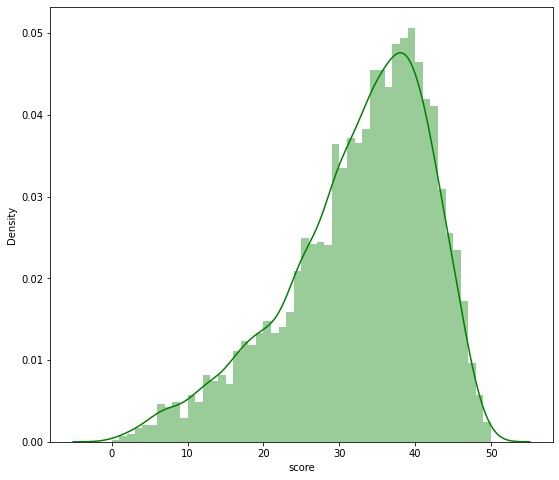

In [9]:
print(tma['score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(tma['score'], color='g', bins=50, hist_kws={'alpha': 0.4});

(array([  30.,  101.,  185.,  301.,  427.,  725., 1033., 1285., 1005.,
         316.]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <BarContainer object of 10 artists>)

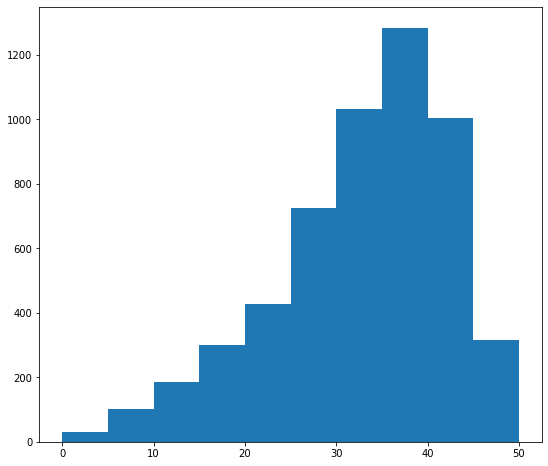

In [10]:
plt.figure(figsize=(9, 8))
plt.hist(tma['score'])

<function matplotlib.pyplot.show(close=None, block=None)>

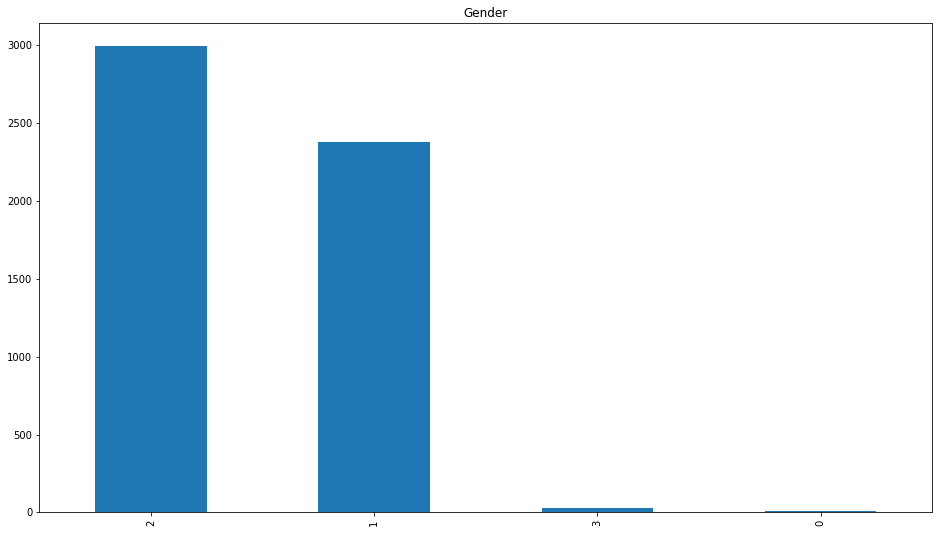

In [11]:
tma['gender'].value_counts().plot(kind='bar', title='Gender', figsize=(16,9))
plt.show

We can see that there is a huge difference in the number of participants gender so we will do some further data exploration for this variable

Text(0.5, 1.0, 'Violin Plot for genders over the score')

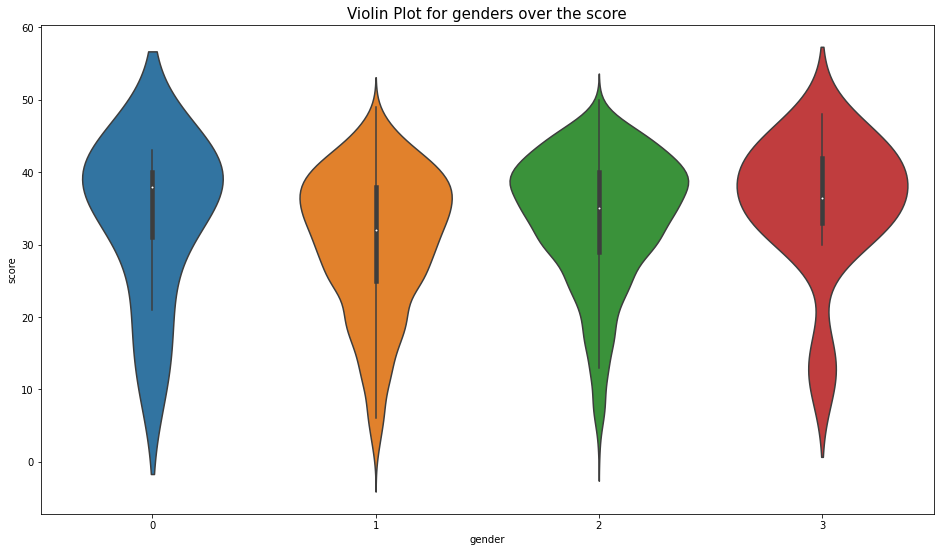

In [12]:
plt.figure(figsize=(16, 9))
sns.violinplot( y='score', x= 'gender', data=tma, orient='v')
plt.title('Violin Plot for genders over the score', fontsize = 15)

We can see from the figure above that the genders are approximetly equally distrbuted all overs the scores

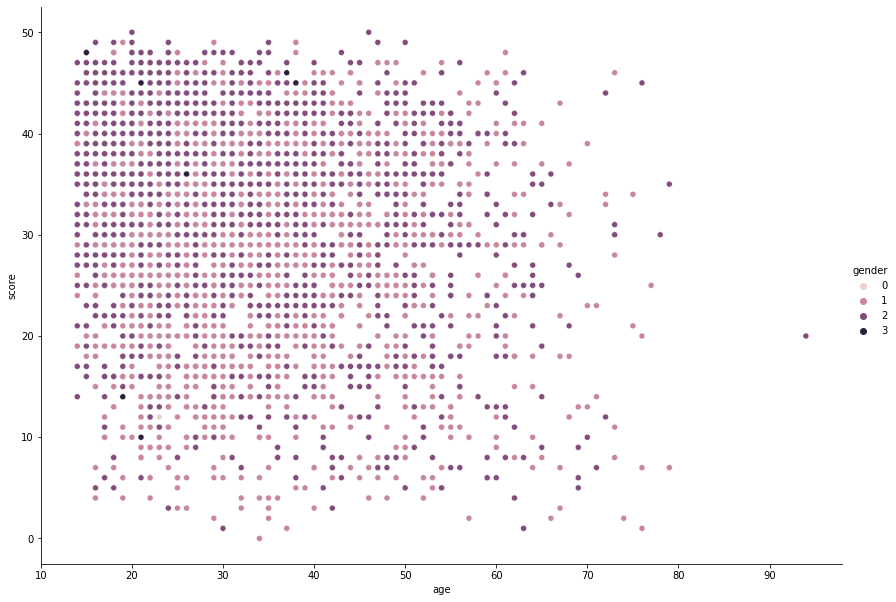

In [13]:
sns.relplot(
    data=tma,
    x="age", y="score" , hue = 'gender',height=8.27, aspect=11.7/8.27
)

we can see from the figure above that the women have higher levels of anaxiety compared to men especially between the age of 20 and 35 , and above 40 years old the men have higher levels of anaxiety compared to women . 
maybe we can say that the levels of anaxiety between the women decrease by the age unlike the men that the anaxiety levels increase by the age. 
Also an important note that female under 20 has the higher level of anaxiety but we should remember that some of them under 18 and the test is designed in general for the adults. 

## Variable Selection and descovering correlation
For good predictions of the regression outcome, it is essential to include the good independent variables (features) for fitting the regression model (variables that are <b>not</b> highly correlated). If we include all features, there are chances that we might not get all significant predictors in the model.  
We can write an algorithm to check all possible combinations and train a new model for each combination and evaluate it using BIC, AIC or accuracy; for example train a model using the variables (age, gender, Q1) then evaluate this model, and then train the model with another variation like (age, gender, Q2) then evaluate it etc..  
but this method is time and resources consuming, thus we will visualize the data, apply "variance inflation factor (VIF)" to find the correlation among the independent variables, choose these variables to train a model

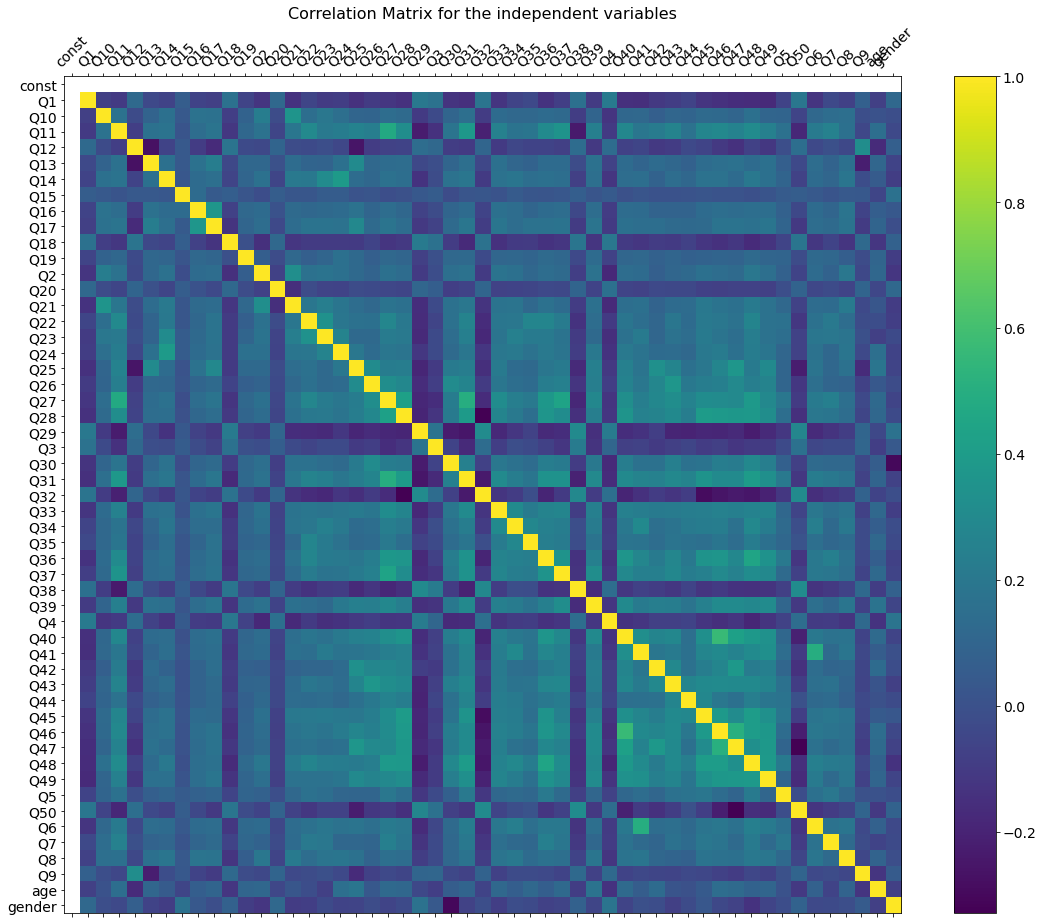

In [18]:
x = tma[tma.columns.difference(['score'])]
x = sm.add_constant(x)
plot = plt.figure(figsize=(19, 15))
plt.matshow(x.corr(), fignum = plot.number)
plt.xticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(x.select_dtypes(['number']).shape[1]), x.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix for the independent variables', fontsize=16);
# plt.savefig('result.jpg', bbox_inches='tight', pad_inches=0.0)

In [19]:
corr = tma.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

In [20]:
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], index=x.columns)

const     179.593734
Q1          1.169432
Q10         1.228550
Q11         1.545955
Q12         1.286208
Q13         1.282154
Q14         1.312246
Q15         1.076468
Q16         1.245223
Q17         1.318390
Q18         1.184459
Q19         1.092410
Q2          1.235852
Q20         1.090220
Q21         1.360460
Q22         1.340338
Q23         1.378300
Q24         1.342926
Q25         1.519581
Q26         1.390867
Q27         1.823862
Q28         1.600141
Q29         1.382881
Q3          1.140505
Q30         1.360360
Q31         1.643529
Q32         1.415947
Q33         1.324570
Q34         1.335767
Q35         1.248641
Q36         1.537508
Q37         1.462577
Q38         1.319749
Q39         1.348682
Q4          1.208462
Q40         1.697374
Q41         1.578889
Q42         1.339614
Q43         1.409364
Q44         1.246326
Q45         1.543276
Q46         1.882955
Q47         1.749922
Q48         1.673503
Q49         1.484860
Q5          1.141592
Q50         1.396277
Q6          1

## Linear Regression Using Only "age" Variable

In [21]:
x = tma[['age']]
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using only age variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using only age variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using only age variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     256.5
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           3.98e-56
Time:                        14:36:37   Log-Likelihood:                -15737.
No. Observations:                4326   AIC:                         3.148e+04
Df Residuals:                    4324   BIC:                         3.149e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.9068      0.380     99.789      0.0

## Linear Regression Using Only "gender" Variable

In [22]:
x = tma[['gender']]
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using only gender variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using only gender variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using only gender variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     118.7
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           2.71e-27
Time:                        14:36:40   Log-Likelihood:                -15803.
No. Observations:                4326   AIC:                         3.161e+04
Df Residuals:                    4324   BIC:                         3.162e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4993      0.459     59.967      0.0

## Linear Regression Using "age" and "gender" variables

In [23]:
x = tma[['gender','age']]
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using age and gender variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using age and gender variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using age and gender variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     180.7
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           4.16e-76
Time:                        14:36:47   Log-Likelihood:                -15688.
No. Observations:                4326   AIC:                         3.138e+04
Df Residuals:                    4323   BIC:                         3.140e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3941      0.589     56.730      0.0

## Linear Regression using only 10 random questions

In [24]:
x = tma[tma.columns.difference(['score','age','gender'])]
x = x.sample(n=10,axis='columns')
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using age and gender variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using age and gender variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using age and gender variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     720.6
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:36:50   Log-Likelihood:                -13738.
No. Observations:                4326   AIC:                         2.750e+04
Df Residuals:                    4315   BIC:                         2.757e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6174      0.735     68.870      0.0

## Linear Regression using only 20 random questions

In [33]:
x = tma[tma.columns.difference(['score','age','gender'])]
x = x.sample(n=20,axis='columns')
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using age and gender variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using age and gender variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using age and gender variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     754.0
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:15   Log-Likelihood:                -12607.
No. Observations:                4326   AIC:                         2.526e+04
Df Residuals:                    4305   BIC:                         2.539e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7661      0.670     74.261      0.0

## Linear Regression using only the questions

In [34]:
x = tma[tma.columns.difference(['score','age','gender'])]
x = x.sample(n=50,axis='columns')
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE using age and gender variable = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE using age and gender variable = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared using age and gender variable =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1247.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:19   Log-Likelihood:                -9920.8
No. Observations:                4326   AIC:                         1.994e+04
Df Residuals:                    4275   BIC:                         2.027e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5601      0.471     71.188      0.0

## Linear Regression Using All Availabe Variables

In [35]:
x = tma[tma.columns.difference(['score'])]
x = sm.add_constant(x)
y = tma['score'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

linear_regressor = sm.OLS(y_train,X_train).fit()
print(linear_regressor.summary())
y3_pred = linear_regressor.predict(X_test)
print('MAE Using all available Variables = ' , metrics.mean_absolute_error(y_test, y3_pred))
print('MSE Using all available Variables = ' , metrics.mean_squared_error(y_test, y3_pred))
print('The R Squared Using all available Variables =', metrics.r2_score(y_test, y3_pred))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1207.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:22   Log-Likelihood:                -9908.0
No. Observations:                4326   AIC:                         1.992e+04
Df Residuals:                    4273   BIC:                         2.026e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2151      0.491     69.668      0.0

## PCA

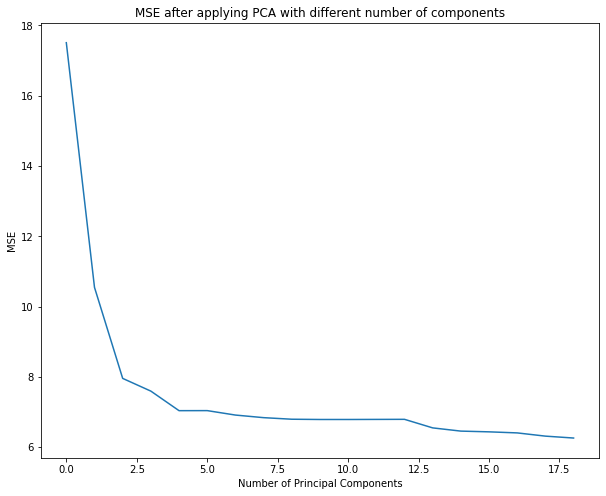

In [44]:
pca = PCA()
X_reduced = pca.fit_transform(scale(x))
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plot = plt.figure(figsize=(10, 8))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('MSE after applying PCA with different number of components')
plt.savefig('MSE for PCA.jpg', bbox_inches='tight', pad_inches=0.0)

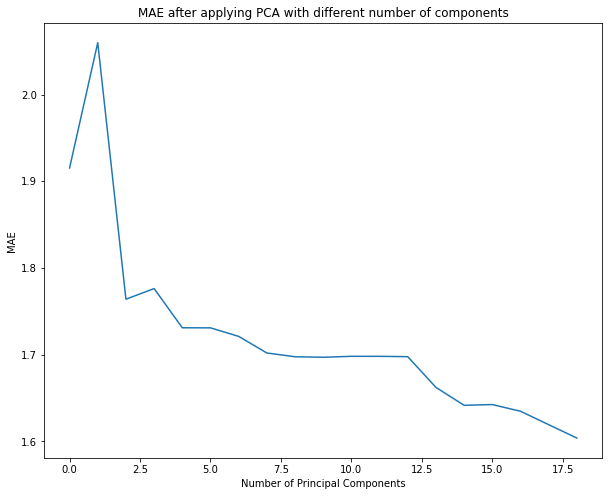

In [45]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(x))
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mae = []
# Calculate MAE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_absolute_error').mean()
    mae.append(score)
    
plot = plt.figure(figsize=(10, 8))
plt.plot(mae)
plt.xlabel('Number of Principal Components')
plt.ylabel('MAE')
plt.title('MAE after applying PCA with different number of components')
plt.savefig('MAE for PCA.jpg', bbox_inches='tight', pad_inches=0.0)

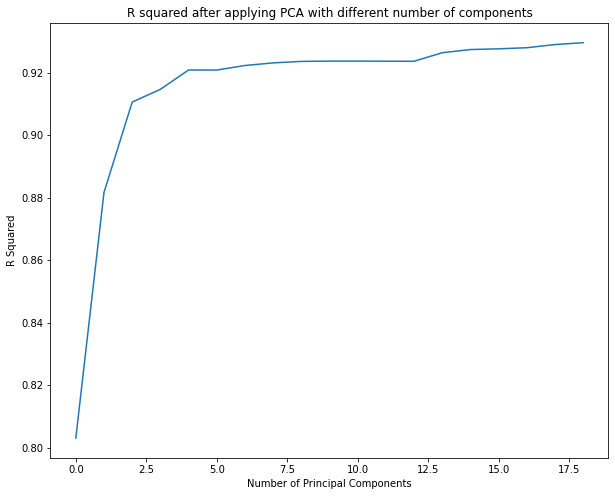

In [46]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(x))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
r2 = []

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 20):
    score = model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='r2').mean()
    r2.append(score)
    
# Plot cross-validation results    
plot = plt.figure(figsize=(10, 8))
plt.plot(r2)
plt.xlabel('Number of Principal Components')
plt.ylabel('R Squared')
plt.title('R squared after applying PCA with different number of components')
plt.savefig('R^2 for PCA.jpg', bbox_inches='tight', pad_inches=0.0)

# Classification
## Binary Classification
 

In [47]:
TMA_data = pd.read_csv('data.csv')
TMA_data.duplicated().sum()
TMA_data.drop_duplicates(inplace=True)
mean_age = round(TMA_data['age'].mean())
for i in TMA_data['age']:
    if i > 100: 
        TMA_data['age'].replace(i,mean_age,inplace = True)

<h3>Logistic Regression Model with all variables</h3>
First we will add a column and this column take one of two values : 0 or 1 
if the score more than 25 it take 1 and 0 otherwise
this column called the abnormal anxiety, because in the test page they say if you get higher than 25 score, then that indicates abnormal levels of anaxiety

In [48]:
TMA_data['abnormal_anxiety'] = [0 if x <= 25 else 1 for x in TMA_data['score']]

In [49]:
X = TMA_data.iloc[:,1:53]
y = TMA_data['abnormal_anxiety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("The F-score for logistic regression included all variables is : ",f1_score(y_test, y_pred))

The F-score for logistic regression included all variables is :  0.9704840613931521


<h3>Gaussian Naive Bayes Model with all variables</h3>

In [50]:
model1 = GaussianNB()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print("The F-score for Gaussian NB included all variables is : ",f1_score(y_test, y_pred))

The F-score for Gaussian NB included all variables is :  0.9488139825218477


<h3>Decision Tree Model with all variables</h3>

In [51]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("The F-score for DT Classifier included all variables is : ",f1_score(y_test, y_pred))

The F-score for DT Classifier included all variables is :  0.9348475791990437


<h3>Random Forest Model with all variables</h3>

In [52]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print("The F-score for Random Forest Classifier included all variables is : ",f1_score(y_test, y_pred))

The F-score for Random Forest Classifier included all variables is :  0.975868157739847


<h3>Logistic Regression Model without age and gender</h3>

In [53]:
X1 = TMA_data.iloc[:,3:53]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=9)
model4 = LogisticRegression(max_iter = 1000)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
print("The F-score for logistic regression without age and gender : ",f1_score(y_test, y_pred))

The F-score for logistic regression without age and gender :  0.9699115044247788


<h3>Logistic Regression Model just (age and gender)</h3>

In [54]:
X2 = TMA_data[["age","gender"]]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=9)
model5 = LogisticRegression(max_iter = 1000)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("The F-score for logistic regression with age and gender : ",f1_score(y_test, y_pred))

The F-score for logistic regression with age and gender :  0.8737558931377685


<h3>Random Forest Model just (age and gender)</h3>

In [55]:
model8 = RandomForestClassifier()
model8.fit(X_train,y_train)
y_pred = model8.predict(X_test)
print("The F-score for Random Forest  with age and gender : ",f1_score(y_test, y_pred))

The F-score for Random Forest  with age and gender :  0.8723068838675776


<h3>Logistic Regression Model using age variable</h3>

In [56]:
X3 = TMA_data[["age"]]
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=9)
model6 = LogisticRegression()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print("The F-score for logistic regression with age : ",f1_score(y_test, y_pred))

The F-score for logistic regression with age :  0.8746081504702194


<h3>Logistic Regression Model using only gender variable</h3>

In [57]:
X4 = TMA_data[["gender"]]
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=9)
model7 = LogisticRegression()
model7.fit(X_train,y_train)
y_pred = model7.predict(X_test)
print("The F-score for logistic regression with gender : ",f1_score(y_test, y_pred))

The F-score for logistic regression with gender :  0.874089490114464


<h3>Trying to get insights </h3>

As we see above in the binary classification problem , the model is doing well even if we just take the gender and age or one of them, because of that we will try to draw the data based on these two features and see the distrbution of the two classes based on these two features.

C:\Users\MTG\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


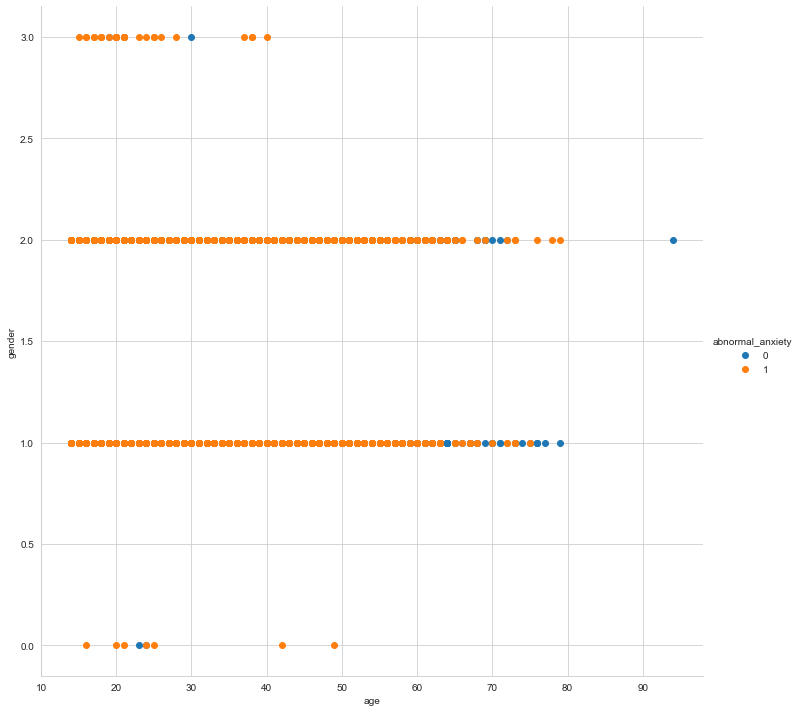

In [58]:
sns.set_style("whitegrid")
sns.FacetGrid(TMA_data, hue="abnormal_anxiety", size=10) \
   .map(plt.scatter, "age", "gender") \
   .add_legend()
plt.show()

we see from the graph above that the class 1 is dominant so we will see how samples are distrbuted over the two classes 

Text(0, 0.5, 'Number of Samples')

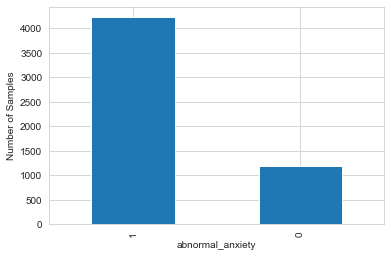

In [59]:
ax = TMA_data['abnormal_anxiety'].value_counts().plot.bar()
ax.set_xlabel("abnormal_anxiety")
ax.set_ylabel("Number of Samples")

So here we have unbalanced problem , so we will try to solve it by do up-sampling

In [60]:
class_count_0, class_count_1 = TMA_data['abnormal_anxiety'].value_counts()

# Separate class
class_0 = TMA_data[TMA_data['abnormal_anxiety'] == 0]
class_1 = TMA_data[TMA_data['abnormal_anxiety'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (1179, 54)
class 1: (4229, 54)


In [61]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(TMA_data.iloc[:,0:53], TMA_data['abnormal_anxiety'])
TMA_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
TMA_data.columns = TMA_data.columns
TMA_data['abnormal_anxiety'].value_counts()

0    4259
1    4229
Name: abnormal_anxiety, dtype: int64

Text(0, 0.5, 'Number of Samples')

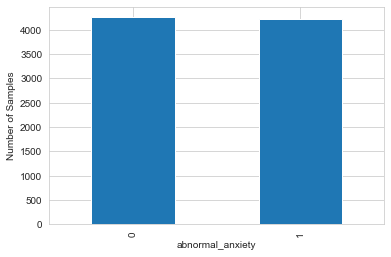

In [62]:
ax = TMA_data['abnormal_anxiety'].value_counts().plot.bar()
ax.set_xlabel("abnormal_anxiety")
ax.set_ylabel("Number of Samples")

<h3>Logistic Regression after oversampling</h3>

In [63]:
X = TMA_data.iloc[:,1:53]
y = TMA_data['abnormal_anxiety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("The F-score for logistic regression after oversampling included all variables is : ",f1_score(y_test, y_pred))

The F-score for logistic regression after oversampling included all variables is :  0.9289044289044288


we see that the F-score has gone down a little bit after oversampling    
Now we will try the model just with the gender and age and see the result 

In [64]:
X2 = TMA_data[["age","gender"]]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=9)
model5 = LogisticRegression(max_iter = 1000)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("The F-score for logistic regression after oversampling with age and gender : ",f1_score(y_test, y_pred))

The F-score for logistic regression after oversampling with age and gender :  0.6055625790139064


Now we see that the F-score reduced dramatically    
Now we will try the model without age and gender

In [65]:
X2 = TMA_data.iloc[:,3:53]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=9)
model5 = LogisticRegression(max_iter = 1000)
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("The F-score for logistic regression after oversampling with age and gender : ",f1_score(y_test, y_pred))

The F-score for logistic regression after oversampling with age and gender :  0.9229871645274212


so we see the result approximtely doesn't change and we can conclude from this result that the age and gender are not useful variables in this problem.

So let do another try with random forest classifier after oversampling

<h3>Random forest after oversampling</h3>

In [66]:
X = TMA_data.iloc[:,1:53]
y = TMA_data['abnormal_anxiety']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("The F-score for random forest classifier after oversampling included all variables is : ",f1_score(y_test, y_pred))

The F-score for random forest classifier after oversampling included all variables is :  0.9638273045507584


So here the result doesn't change approximtely after oversampling 

In [67]:
X2 = TMA_data[["gender","age"]]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=9)
model5 = RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("The F-score for RandomForestClassifier after oversampling with age and gender : ",f1_score(y_test, y_pred))

The F-score for RandomForestClassifier after oversampling with age and gender :  0.6160547604231488


In [68]:
X2 = TMA_data.iloc[:,3:53]
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=9)
model5 = RandomForestClassifier()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print("The F-score for RandomForestClassifier after oversampling with age and gender : ",f1_score(y_test, y_pred))

The F-score for RandomForestClassifier after oversampling with age and gender :  0.9620548744892002


So we conclude here that the random forest classfier is the best one for the binary problem and  age and gender variables are not really important

# Multi label Classification
Based on the original website for the test, they split the anxiety levels into 4 categories based on the score. 

These categories are {no anxiety , mild anxiety, moderate anxiety , severe anxiety}

In [69]:
TMA_data = pd.read_csv('data.csv')
TMA_data.drop_duplicates(inplace=True)
mean_age = round(TMA_data['age'].mean())
for i in TMA_data['age']:
    if i > 100: 
        TMA_data['age'].replace(i,mean_age,inplace = True)
TMA_data['score_level'] = [0 if (x >= 0 and x <= 25) else 1 if(x >= 26 and x <= 30) else 2 if(x >= 31 and x <= 35) else 3  for x in TMA_data['score']]

<h3>Logistic regression with all variables</h3

In [70]:
X = TMA_data.iloc[:,1:53]
y = TMA_data['score_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
lr = LogisticRegression(max_iter = 1000)
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for logistic regression with multilabel classes is :",f1_score(y_test, y_pred, average="micro"))

The F-score for logistic regression with multilabel classes is : 0.8031423290203328


<h3>Random forest using all variables </h3>

In [71]:
cf = RandomForestClassifier()
clf = OneVsRestClassifier(cf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for random forest with multilabel classes is :",f1_score(y_test, y_pred, average="micro"))

The F-score for random forest with multilabel classes is : 0.7772643253234751


<h3>LDA using all variables</h3>

In [72]:
la = LinearDiscriminantAnalysis()
la.fit(X_train, y_train)
y_pred = la.predict(X_test)
print("The F-score for Linear disciminant analysis with multilabel classes is :",f1_score(y_test, y_pred, average="micro"))

The F-score for Linear disciminant analysis with multilabel classes is : 0.8243992606284658


here we see that the lda give the best result

<h3>Multilabel Classification Problem with Dimension Reduction (PCA)</h3>

In [73]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=9)
cf = RandomForestClassifier()
clf = OneVsRestClassifier(cf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for random forest with multilabel classes with PCA is :",f1_score(y_test, y_pred, average="micro"))

The F-score for random forest with multilabel classes with PCA is : 0.9075785582255084


## Applying LDA on newly created data after applying PCA

In [74]:
la = LinearDiscriminantAnalysis()
la.fit(X_train, y_train)
y_pred = la.predict(X_test)
print("The F-score for Linear disciminant analysis with multilabel classes with PCA is :",f1_score(y_test, y_pred, average="micro"))

The F-score for Linear disciminant analysis with multilabel classes with PCA is : 0.8428835489833642


Here we see that the PCA improved the result very well with the random forest classifier

<h3>Trying to get insights </h3>

C:\Users\MTG\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


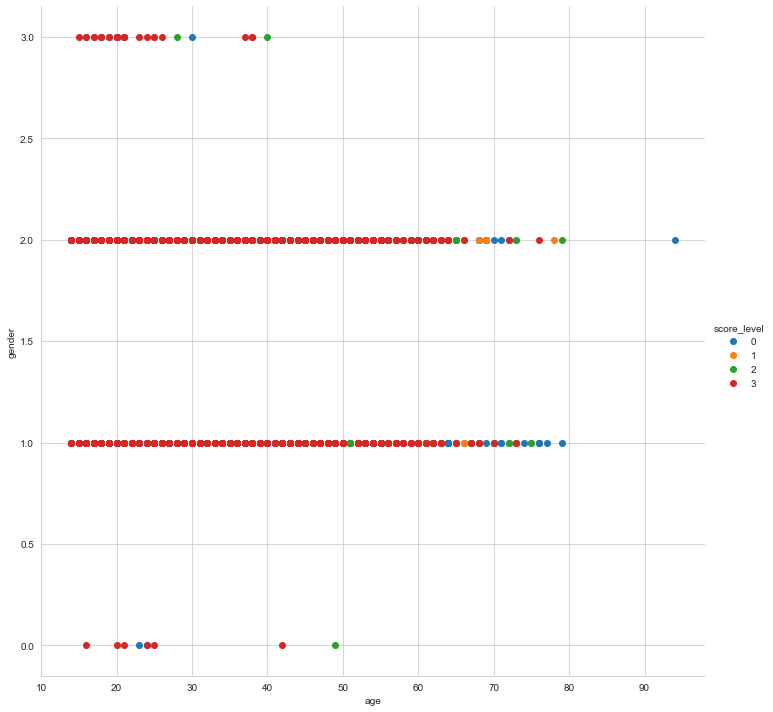

In [75]:
sns.set_style("whitegrid")
sns.FacetGrid(TMA_data, hue="score_level", size=10) \
   .map(plt.scatter, "age", "gender") \
   .add_legend()
plt.show()

We can see that there is the same problem. A dominant class, so we will try to solve the problem by up-sampling

Text(0, 0.5, 'Number of Samples')

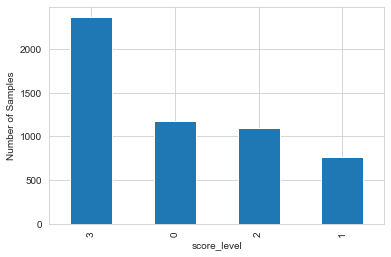

In [76]:
ax = TMA_data['score_level'].value_counts().plot.bar()
ax.set_xlabel("score_level")
ax.set_ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

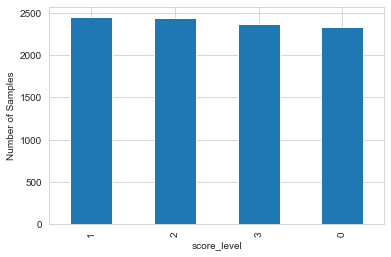

In [77]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(TMA_data.iloc[:,0:53], TMA_data['score_level'])
TMA_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
TMA_data.columns = TMA_data.columns
TMA_data['score_level'].value_counts()
ax = TMA_data['score_level'].value_counts().plot.bar()
ax.set_xlabel("score_level")
ax.set_ylabel("Number of Samples")

### Applying Logistic Regression on the new data

In [78]:
X = TMA_data.iloc[:,1:53]
y = TMA_data['score_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
lr = LogisticRegression(max_iter = 1000)
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for logistic regression with multilabel classes is :",f1_score(y_test, y_pred, average="micro"))

The F-score for logistic regression with multilabel classes is : 0.6778067885117494


## Random Forest

In [79]:
cf = RandomForestClassifier()
clf = OneVsRestClassifier(cf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for random forest with multilabel classes is :",f1_score(y_test, y_pred, average="micro"))

The F-score for random forest with multilabel classes is : 0.8804177545691906


## Applying PCA then Random Forest

In [80]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=9)
cf = RandomForestClassifier()
clf = OneVsRestClassifier(cf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("The F-score for random forest with multilabel classes with PCA is :",f1_score(y_test, y_pred, average="micro"))

The F-score for random forest with multilabel classes with PCA is : 0.8318537859007833


## Applying LDA

In [81]:
la = LinearDiscriminantAnalysis()
la.fit(X_train, y_train)
y_pred = la.predict(X_test)
print("The F-score for Linear disciminant analysis with multilabel classes with PCA is :",f1_score(y_test, y_pred, average="micro"))

The F-score for Linear disciminant analysis with multilabel classes with PCA is : 0.6809399477806789
